In [ ]:
pip install -q tensorflow==2.4.1

     |████████████████████████████████| 394.3 MB 13 kB/s 
     |████████████████████████████████| 3.8 MB 43.7 MB/s 
     |████████████████████████████████| 462 kB 67.1 MB/s 
     |████████████████████████████████| 2.9 MB 55.3 MB/s 


### Load Necessary Module

https://github.com/XanaduAI/quantum-transfer-learning

https://colab.research.google.com/drive/1ZU-5khIo9ViM8oS4e_Y5km87kC5dwDtN#scrollTo=D7S-YPmLGV9m

https://www.youtube.com/playlist?list=PLQY2H8rRoyvx4VttfJOPRslw8XWT7yaBJ


blog explanation: http://maditt.com/tensorflow-quantum-machine-learning-and-quantum-computing-meet-in-an-open-source-library/

https://medium.com/mdr-inc/tensorflow-quantum-basic-tutorial-explained-with-supplementary-2f69011036c0

In [ ]:
pip install -q tensorflow-quantum

     |████████████████████████████████| 91 kB 10.2 MB/s 
     |████████████████████████████████| 91 kB 10.8 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit


In [ ]:
print ('Module Load Done!')

Module Load Done!


### Data Read and Pre-processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
df_x = pd.read_csv('/content/drive/My Drive/zadid/X_train2.txt',names=[ str(i) for i in range(1,14)])
df_y = pd.read_csv('/content/drive/My Drive/zadid/y_train2.txt',names=['label'])

df_x_test = pd.read_csv('/content/drive/My Drive/zadid/X_test2.txt',names=[ str(i) for i in range(1,14)])
df_y_test = pd.read_csv('/content/drive/My Drive/zadid/y_test2.txt',names=['label'])


df_x = df_x.abs()
df_x_test = df_x_test.abs()

In [ ]:
df_x_test.min()

1      0.0000
2      0.0000
3      0.0000
4      0.0000
5      4.4547
6      0.0000
7      0.8391
8      0.0000
9      0.0000
10     0.0000
11     0.0000
12     0.0000
13    53.5160
dtype: float64

In [ ]:
min_max_scaler = MinMaxScaler()
scaler = StandardScaler()
df_x = pd.DataFrame(scaler.fit_transform(df_x), columns=df_x.columns)
df_x = pd.DataFrame(min_max_scaler.fit_transform(df_x), columns=df_x.columns)

df_x_test = pd.DataFrame(scaler.fit_transform(df_x_test), columns=df_x.columns)
df_x_test = pd.DataFrame(min_max_scaler.fit_transform(df_x_test), columns=df_x.columns)

In [ ]:
df_x.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.332005,0.0,1.0,0.066667,0.0,0.0,0.0,0.14176,0.0
1,0.0,0.0,0.0,0.0,0.332005,0.0,1.0,0.066667,0.0,0.0,0.0,0.14176,0.0
2,0.0,0.0,0.0,0.0,0.332005,0.0,1.0,0.066667,0.0,0.0,0.0,0.14176,0.0
3,0.0,0.0,0.0,0.0,0.332005,0.0,1.0,0.053921,0.0,0.0,0.0,0.14176,0.0
4,0.0,0.0,0.0,0.0,0.332005,0.0,1.0,0.000000,0.0,0.0,0.0,0.14176,0.0


In [ ]:
df_x.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.111312,0.280730,0.293126,0.280681,0.355493,0.174546,0.635420,0.043769,0.041899,0.185160,0.269405,0.232466,0.293264
std,0.291110,0.156833,0.136418,0.164517,0.112911,0.224669,0.424832,0.115761,0.101211,0.089285,0.152598,0.148484,0.235429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.205708,0.188006,0.205708,0.251963,0.000000,0.138599,0.000000,0.000000,0.150286,0.187022,0.170102,0.105232
50%,0.000000,0.245717,0.232371,0.245717,0.406568,0.070175,1.000000,0.000000,0.000000,0.190757,0.223397,0.203186,0.175432
75%,0.000000,0.274287,0.364653,0.274287,0.432020,0.315789,1.000000,0.000000,0.000000,0.202314,0.256075,0.225792,0.438581
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_x_test.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13
count,35210.000000,35210.000000,35210.000000,35210.000000,35210.000000,35210.000000,35210.000000,35210.000000,35210.000000,35210.000000,35210.000000,35210.000000,35210.000000
mean,0.162156,0.309992,0.394365,0.311496,0.367256,0.206934,0.641478,0.066525,0.076325,0.206114,0.324016,0.323988,0.359714
std,0.363544,0.195180,0.176574,0.192277,0.143355,0.250671,0.424102,0.156931,0.162864,0.102827,0.199943,0.204097,0.271267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.207101,0.243287,0.213009,0.243633,0.000000,0.138599,0.000000,0.000000,0.130772,0.218932,0.214939,0.119963
50%,0.000000,0.254438,0.308822,0.254438,0.390716,0.135259,1.000000,0.000000,0.000000,0.199554,0.254529,0.265561,0.199990
75%,0.000000,0.314106,0.471703,0.313545,0.474729,0.328273,1.000000,0.000000,0.000000,0.233877,0.331359,0.327315,0.499974
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#df_y.head()
#print (df_x[['1']].max())
print (df_x[['2']].max())

print (len(df_x))

2    1.0
dtype: float64
60000


### Build CAN image

In [ ]:
x = []
y = []

np_x = df_x.to_numpy()[1000:40000]
np_y = df_y.to_numpy()[1000:40000]


print ('processing train data...')
for i in range(len(np_x)-13):
    if(i%13==0):
      img = np_x[i:i+13,:].reshape(13,13,1)
      #img = np_x[i,:]
      img = np.resize(img,(4,4,1))
        
      label = 1 if 1 in np_y[i:i+13,:] else 0
      #label = np_y[i] #1 if 1 in np_y[i:i+13,:] else 0
      x.append(img)
      y.append(label)

    #i+=13

print ('Done')

x_train = np.array(x)
y_train = np.array(y)

processing train data...
Done


In [ ]:
"""
x = []
y = []

np_x = df_x_test.to_numpy()#[1000:60000]
np_y = df_y_test.to_numpy()#[1000:60000]


print ('processing train data...')
for i in range(len(np_x)-13):
    if(i%13==0):
      img = np_x[i:i+13,:].reshape(13,13,1)
      #img = np_x[i,:]
      #img = np.resize(img,(4,4,1))
        
      label = 1 if 1 in np_y[i:i+13,:] else 0
      #label = np_y[i] #1 if 1 in np_y[i:i+13,:] else 0
      x.append(img)
      y.append(label)

    #i+=13

print ('Done')
x_test = np.array(x)
y_test = np.array(y)
"""

"\nx = []\ny = []\n\nnp_x = df_x_test.to_numpy()#[1000:60000]\nnp_y = df_y_test.to_numpy()#[1000:60000]\n\n\nprint ('processing train data...')\nfor i in range(len(np_x)-13):\n    if(i%13==0):\n      img = np_x[i:i+13,:].reshape(13,13,1)\n      #img = np_x[i,:]\n      #img = np.resize(img,(4,4,1))\n        \n      label = 1 if 1 in np_y[i:i+13,:] else 0\n      #label = np_y[i] #1 if 1 in np_y[i:i+13,:] else 0\n      x.append(img)\n      y.append(label)\n\n    #i+=13\n\nprint ('Done')\nx_test = np.array(x)\ny_test = np.array(y)\n"

In [ ]:
x = np.array(x_train)
y = np.array(y_train)

#t_size = int(0.8*len(x))
#x_train, x_test = x[:t_size], x[t_size:]
#y_train, y_test = y[:t_size], y[t_size:]

#import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#x_train = np.array(x_train)
#y_train = np.array(y_train)
#x_test = np.array(x_test)
#y_test = np.array(y_test)


In [ ]:
print ('X train shape: ', x_train.shape)
print ('X Test shape: ', x_test.shape)
print ('y train shape: ', y_train.shape)
print ('y test shape: ', y_test.shape)

X train shape:  (2099, 4, 4, 1)
X Test shape:  (900, 4, 4, 1)
y train shape:  (2099,)
y test shape:  (900,)


### Train a neural network

In [ ]:
def create_full_classical_model():
    # A simple model based off LeNet 
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(13,13,1)))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(16))
    model.add(tf.keras.layers.Dense(1))
    return model


model = create_full_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

EPOCHS = 100
BATCH_SIZE = 8

fair_history = model.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_test, y_test))

fair_nn_results = model.evaluate(x_test, y_test)

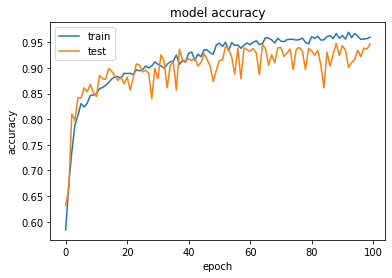

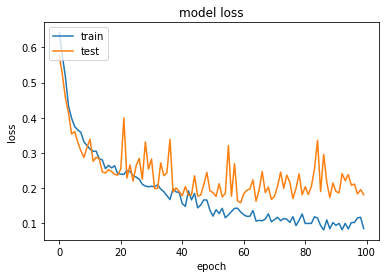

In [ ]:
plt.plot(fair_history.history['accuracy'])
plt.plot(fair_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fair_history.history['loss'])
plt.plot(fair_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 169)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               17000     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 18,633
Trainable params: 18,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[-2].name

'dense_1'

In [ ]:
from tensorflow.keras.models import Model
from sklearn.preprocessing import minmax_scale

print (x_test[0].shape)
layer_name = model.layers[-2].name
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_test[0][None, :, :, :])

#print (intermediate_output)
foo_norm = minmax_scale(intermediate_output, feature_range=(0,1), axis=1)
print (foo_norm)


(13, 13, 1)
[[0.20555902 0.15401259 0.69690347 0.8265917  0.16278183 0.37077922
  0.         0.10360798 0.31347847 0.80509543 0.7752855  0.26893374
  0.8296983  1.         0.81867075 0.17177594]]


In [ ]:
import sys
def show_progress(count, total, status=''):

    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '#' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
    sys.stdout.flush()

In [ ]:
x_trans = []
y_trans = []
total = len(x_train)
for i in range(len(x_train)):
  #print(x_train[i].shape)
  # p = intermediate_layer_model.predict(x_train[i][None, :, :, :])
  # p = minmax_scale(p, feature_range=(0,1), axis=1)
  # p = np.reshape(p,(4,4,1))
  # p = np.resize(x_train[i], (4,4,1))
  x_trans.append(x_train[i])
  y_trans.append(y_train[i])

  #show_progress(i,total)
print ('Done')



Done


In [ ]:
x_trans_test = []
y_trans_test = []

for i in range(len(x_test)):
  #print(x_train[i].shape)
  # p = intermediate_layer_model.predict(x_test[i][None, :, :, :])
  # p = minmax_scale(p, feature_range=(0,1), axis=1)
  # p = np.reshape(p,(4,4,1))

  x_trans_test.append(x_test[i])
  y_trans_test.append(y_test[i])

print ('Done')

Done


In [ ]:
x_trans = np.array(x_trans)
y_trans = np.array(y_trans)

print (x_trans.shape)
print (y_trans.shape)

(2099, 4, 4, 1)
(2099,)


In [ ]:
x_trans_test = np.array(x_trans_test)
y_trans_test = np.array(y_trans_test)

print (x_trans_test.shape)
print (y_trans_test.shape)

(900, 4, 4, 1)
(900,)


In [ ]:
np.save('/content/drive/My Drive/zadid/qnn_np_x_train.npy',x_trans)
np.save('/content/drive/My Drive/zadid/qnn_np_y_train.npy',y_trans)
np.save('/content/drive/My Drive/zadid/qnn_np_x_test.npy',x_trans_test)
np.save('/content/drive/My Drive/zadid/qnn_np_y_test.npy',y_trans_test)

1075
1024
471
429


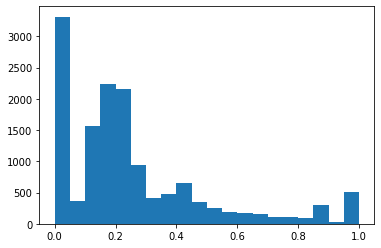

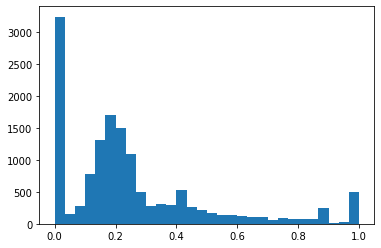

In [ ]:
print (np.count_nonzero(y_train == 1))
print (np.count_nonzero(y_train == 0))

print (np.count_nonzero(y_test == 1))
print (np.count_nonzero(y_test == 0))


plt.hist(x_trans_test.flatten(),bins=20)
plt.show()

plt.hist(x_trans_test.flatten(),bins=30)
plt.show()

### Load the trained data from drive

In [ ]:
x_trans = np.load('/content/drive/My Drive/zadid/qnn_np_x_train.npy')
y_trans = np.load('/content/drive/My Drive/zadid/qnn_np_y_train.npy')
x_trans_test = np.load('/content/drive/My Drive/zadid/qnn_np_x_test.npy')
y_trans_test = np.load('/content/drive/My Drive/zadid/qnn_np_y_test.npy')

### Quantum Encoding

In [ ]:
print ('total trained data: X train ', x_trans.shape)
print ('total trained data: Y train ', y_trans.shape)
print ('total test  data: X test ', x_trans_test.shape)
print ('total test data: Y test ', y_trans_test.shape)

total trained data: X train  (2099, 4, 4, 1)
total trained data: Y train  (2099,)
total test  data: X test  (900, 4, 4, 1)
total test data: Y test  (900,)


In [ ]:
per = 1.0
x_train_nums = int(x_trans.shape[0]*per)
x_test_nums = int(x_trans_test.shape[0]*1.0)

In [ ]:
x_train = x_trans[:x_train_nums]
x_test = x_trans_test[:x_test_nums]
y_train = y_trans[:x_train_nums]
y_test = y_trans_test[:x_test_nums]

x_train_small = tf.image.resize(x_train, (4,4)).numpy()
x_test_small = tf.image.resize(x_test, (4,4)).numpy()

In [ ]:
print ('total trained data: X train ', x_train_small.shape)
print ('total trained data: Y train ', y_train.shape)
print ('total test  data: X test ', x_test_small.shape)
print ('total test data: Y test ', y_test.shape)

total trained data: X train  (2099, 4, 4, 1)
total trained data: Y train  (2099,)
total test  data: X test  (900, 4, 4, 1)
total test data: Y test  (900,)


0


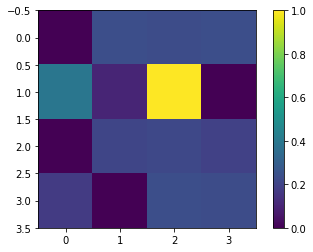

In [ ]:
import random as random

idx = random.randint(0,len(x_train_small))
print(y_train[idx])

plt.imshow(x_train_small[idx,:,:,0], vmin=0, vmax=1)
plt.colorbar()

In [ ]:
THRESHOLD = 0.5

x_train_bin = np.array(x_train_small > THRESHOLD, dtype=np.float32)
x_test_bin = np.array(x_test_small > THRESHOLD, dtype=np.float32)

print (x_train_bin.shape)
print (x_test_bin.shape)

#print (x_train_small[0])
#print (x_train_bin[0])
#print (x_test_bin.shape)


(2099, 4, 4, 1)
(900, 4, 4, 1)


index: 196  label :  1


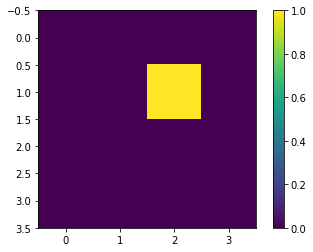

In [ ]:
import random as random

idx = random.randint(0,len(x_train_bin))
print('index:', idx , ' label : ', y_train[idx])


plt.imshow(x_train_bin[idx,:,:,0])
plt.colorbar()

### Remove Contradicting

In [ ]:
def remove_contradicting(xs, ys):
    mapping = collections.defaultdict(set)
    # Determine the set of labels for each unique image:
    for x,y in zip(xs,ys):
       mapping[tuple(x.flatten())].add(y)
    
    new_x = []
    new_y = []
    for x,y in zip(xs, ys):
      labels = mapping[tuple(x.flatten())]
      if len(labels) == 1:
          new_x.append(x)
          new_y.append(list(labels)[0])
      else:
          # Throw out images that match more than one label.
          pass
    
    num_3 = sum(1 for value in mapping.values() if True in value)
    num_6 = sum(1 for value in mapping.values() if False in value)
    num_both = sum(1 for value in mapping.values() if len(value) == 2)

    print("Number of unique images:", len(mapping.values()))
    print("Number of 0s: ", num_3)
    print("Number of 1s: ", num_6)
    print("Number of contradictory images: ", num_both)
    print()
    print("Initial number of examples: ", len(xs))
    print("Remaining non-contradictory examples: ", len(new_x))
    
    return np.array(new_x), np.array(new_y)


In [ ]:
x_train_nocon, y_train_nocon = remove_contradicting(x_train_small, y_train)

Number of unique images: 2072
Number of 0s:  1061
Number of 1s:  1011
Number of contradictory images:  0

Initial number of examples:  2099
Remaining non-contradictory examples:  2099


In [ ]:
x_train_bin, y_train = remove_contradicting(x_train_bin, y_train_nocon)
#_ = remove_contradicting(x_train_bin, y_train_nocon)

Number of unique images: 94
Number of 0s:  68
Number of 1s:  63
Number of contradictory images:  37

Initial number of examples:  2099
Remaining non-contradictory examples:  126


### Build Quantum Circuit

In [ ]:
def convert_to_circuit(image):
    """Encode truncated classical image into quantum datapoint."""
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4, 4)
    circuit = cirq.Circuit()
    for i, value in enumerate(values):
      if value:
        circuit.append(cirq.X(qubits[i]))
    #    if value:
        
    return circuit



aaa

In [ ]:
#x_train_circ = [convert_to_circuit(x) for x in x_train_bin]
#x_test_circ = [convert_to_circuit(x) for x in x_test_bin]

In [ ]:
#SVGCircuit(x_train_circ[100])

print (len(x_train_circ))

126


In [ ]:
#bin_img = x_train_bin[100,:,:,0]
#indices = np.array(np.where(bin_img)).T

In [ ]:
x_train_tfcirc = tfq.convert_to_tensor(x_train_circ)
x_test_tfcirc = tfq.convert_to_tensor(x_test_circ)

In [ ]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout
    
    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


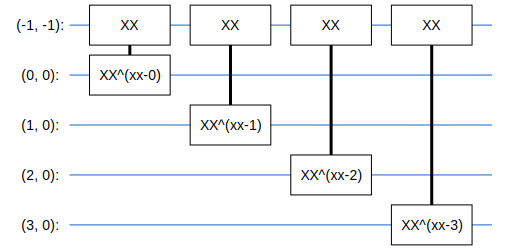

In [ ]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(4,1),
                                   readout=cirq.GridQubit(-1,-1))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.XX, prefix='xx')
#demo_builder.add_layer(circuit, gate = cirq.XX, prefix='yy')
SVGCircuit(circuit)

In [ ]:
def create_quantum_model():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(4, 4)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()
    
    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))
    
    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")
    builder.add_layer(circuit, cirq.XX, "xx2")
    builder.add_layer(circuit, cirq.ZZ, "zz2")

    builder.add_layer(circuit, cirq.XX, "xx3")
    builder.add_layer(circuit, cirq.ZZ, "zz3")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

# create the circuit 
model_circuit, model_readout = create_quantum_model()    

In [ ]:
model_circuit, model_readout = create_quantum_model()

In [ ]:
import sympy

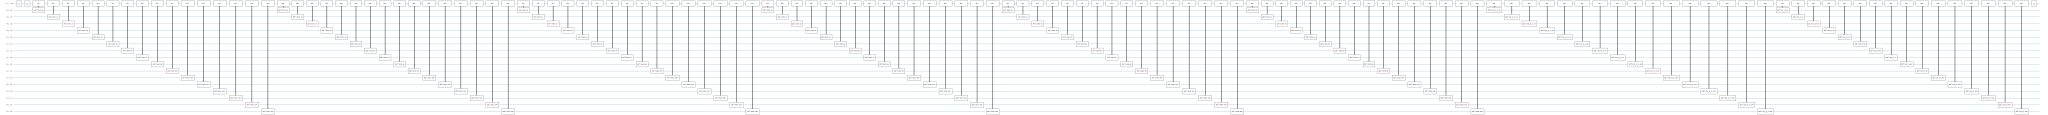

In [ ]:
SVGCircuit(model_circuit)

In [ ]:
# Build the Keras model.
model = tf.keras.Sequential([
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    # The PQC layer returns the expected value of the readout gate, range [-1,1].
    tfq.layers.PQC(model_circuit, model_readout),
])

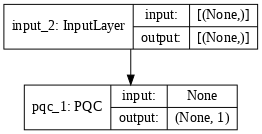

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=70)

In [ ]:
y_train_hinge = 2.0*y_train-1.0
y_test_hinge = 2.0*y_test-1.0

print (y_test_hinge[:20])

[ 1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.]


In [ ]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [ ]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[hinge_accuracy])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
pqc_2 (PQC)                  (None, 1)                 128       
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________
None


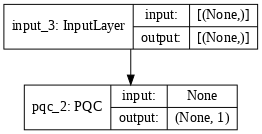

In [ ]:
print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True, dpi=70)

In [ ]:
EPOCHS = 20
BATCH_SIZE = 8

NUM_EXAMPLES = len(x_train_tfcirc)

print (NUM_EXAMPLES)

126


In [ ]:
x_train_tfcirc_sub = x_train_tfcirc[:NUM_EXAMPLES]
y_train_hinge_sub = y_train_hinge[:NUM_EXAMPLES]

### Train Qunantum NN

In [ ]:
qnn_history = model.fit(
      x_train_tfcirc_sub, y_train_hinge_sub,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      verbose=1,
      validation_data=(x_test_tfcirc, y_test_hinge))

Epoch 1/20
16/16 [==============================] - 77s 5s/step - loss: 0.9993 - hinge_accuracy: 0.6415 - val_loss: 0.9996 - val_hinge_accuracy: 0.4978
Epoch 2/20
16/16 [==============================] - 76s 5s/step - loss: 0.9881 - hinge_accuracy: 0.7316 - val_loss: 0.9997 - val_hinge_accuracy: 0.4867
Epoch 3/20
16/16 [==============================] - 76s 5s/step - loss: 0.9826 - hinge_accuracy: 0.7790 - val_loss: 0.9999 - val_hinge_accuracy: 0.4912
Epoch 4/20
16/16 [==============================] - 77s 5s/step - loss: 0.9617 - hinge_accuracy: 0.8063 - val_loss: 1.0002 - val_hinge_accuracy: 0.5022
Epoch 5/20
16/16 [==============================] - 76s 5s/step - loss: 0.9446 - hinge_accuracy: 0.7965 - val_loss: 0.9999 - val_hinge_accuracy: 0.5265
Epoch 6/20
16/16 [==============================] - 76s 5s/step - loss: 0.9157 - hinge_accuracy: 0.8338 - val_loss: 0.9996 - val_hinge_accuracy: 0.4646
Epoch 7/20
16/16 [==============================] - 76s 5s/step - loss: 0.8912 - hinge_a

In [ ]:
qnn_results = model.evaluate(x_test_tfcirc, y_test_hinge)

29/29 [==============================] - 42s 1s/step - loss: 0.8633 - hinge_accuracy: 0.5700


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


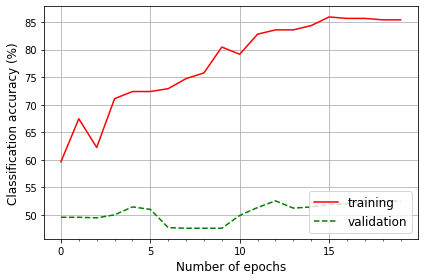

"\n# summarize history for loss\nplt.plot(qnn_history.history['loss'])\nplt.plot(qnn_history.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()\n"

In [ ]:
x_ticks = [int(i) for i in range(0,20)]
import matplotlib.ticker as ticker

plt.plot(x_ticks, np.multiply(qnn_history.history['hinge_accuracy'],100), 'r')
plt.plot(x_ticks, np.multiply(qnn_history.history['val_hinge_accuracy'],100),'g--')
#plt.title('model accuracy')
plt.ylabel('Classification accuracy (%)',fontsize=12)
plt.xlabel('Number of epochs',fontsize=12)
plt.legend(['training', 'validation'], loc='lower right',fontsize=12)
plt.tight_layout()
plt.grid(True)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.savefig('classification accuracy.png',dpi=300)
plt.show()
"""
# summarize history for loss
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
"""

# Fair Mode

In [ ]:
def create_fair_classical_model():
    # A simple model based off LeNet 
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(4,4,1)))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    #model.add(tf.keras.layers.Dense(3, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model


_fair_model = create_fair_classical_model()
_fair_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

_fair_model.summary()
EPOCHS = 50
BATCH_SIZE = 32
_fair_history = _fair_model.fit(x_train_bin,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_test_bin, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 34        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
62/62 [==============================] - 1s 5ms/step - loss: 0.7932 - accuracy: 0.4876 - val_loss: 0.7373 - val_accuracy: 0.4767
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7261 - accuracy: 0.4960 - val_loss: 0.6777 - val_accuracy: 0.4767
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.4722 - val_loss

In [ ]:
fair_nn_results = fair_model.evaluate(x_test, y_test)

29/29 [==============================] - 0s 873us/step - loss: 0.1472 - accuracy: 0.9489


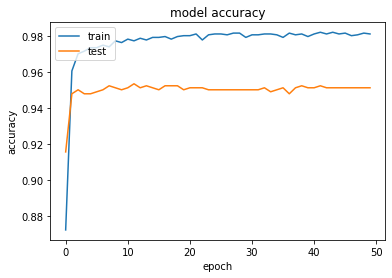

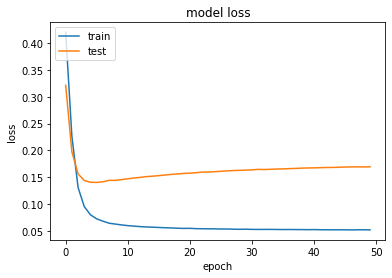

In [ ]:
plt.plot(fair_history.history['accuracy'])
plt.plot(fair_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fair_history.history['loss'])
plt.plot(fair_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
fair_nn_results = fair_model.evaluate(x_test, y_test)

29/29 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9533


In [ ]:
def create_fair_classical_model():
    # A simple model based off LeNet 
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(4,4,1)))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    #model.add(tf.keras.layers.Dense(3, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model


model = create_fair_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 3         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fair_history = model.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_test, y_test))

fair_nn_results = model.evaluate(x_test, y_test)

Epoch 1/50
67/67 [==============================] - 0s 3ms/step - loss: 0.5181 - accuracy: 0.5602 - val_loss: 0.3902 - val_accuracy: 0.6725
Epoch 2/50
67/67 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.5602 - val_loss: 0.3157 - val_accuracy: 0.6725
Epoch 3/50
67/67 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.5602 - val_loss: 0.2809 - val_accuracy: 0.6725
Epoch 4/50
67/67 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.5602 - val_loss: 0.2606 - val_accuracy: 0.6725
Epoch 5/50
67/67 [==============================] - 0s 1ms/step - loss: 0.3026 - accuracy: 0.5602 - val_loss: 0.2458 - val_accuracy: 0.6725
Epoch 6/50
67/67 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.5602 - val_loss: 0.2339 - val_accuracy: 0.6725
Epoch 7/50
67/67 [==============================] - 0s 1ms/step - loss: 0.2731 - accuracy: 0.5602 - val_loss: 0.2237 - val_accuracy: 0.6725
Epoch 8/50
67/67 [==

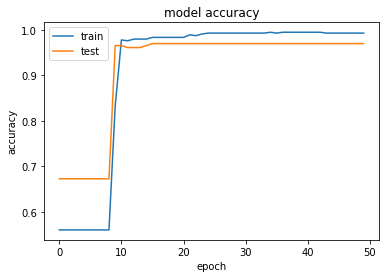

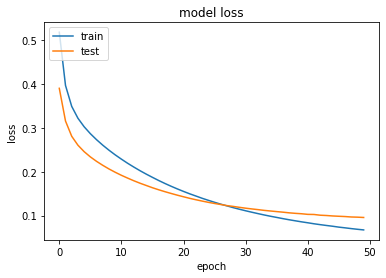

In [ ]:
plt.plot(fair_history.history['accuracy'])
plt.plot(fair_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fair_history.history['loss'])
plt.plot(fair_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()